## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('german_credit.txt')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [3]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isna().sum().sum() # сколько пропусков

0

In [5]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [6]:
# количественные
quantity_columns = [
    'duration',
    'amount',
    'age'
]
# бинарные
bin_columns = [
    'people_liable',
    'telephone',
    'foreign_worker',
    'credit_risk'
]
# порядковые
ord_columns = [
    'status',
    'savings',
    'employment_duration',
    'installment_rate',
    'present_residence',
    'number_credits'
]
# категориальные
cat_columns = [
    'credit_history',
    'purpose',
    'personal_status_sex',
    'other_debtors',
    'property',
    'other_installment_plans',
    'housing',
    'job',
]

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
print(data.groupby("purpose")["amount"].mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
print(len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[(data['age'] < 30)])*100, 'процентов')

66.66666666666666 процентов


In [9]:
print(len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[(data['age'] > 40)])*100, 'процентов')

68.01470588235294 процентов


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
data['number_credits'].value_counts()

1        633
3-Feb    333
5-Apr     28
>= 6       6
Name: number_credits, dtype: int64

In [11]:
len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '5-Apr') | (data['number_credits'] == '>= 6'))])

1

### Задание 6 (1 балл)

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

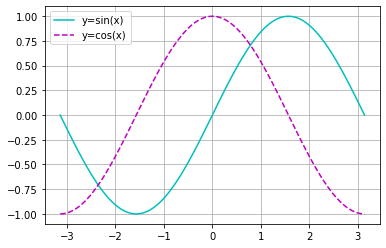

In [13]:
x=np.linspace(-math.pi,math.pi,100)
plt.plot(x, np.sin(x), color = 'c')
plt.plot(x, np.cos(x), color = 'm', linestyle = '--')
plt.grid(True)
plt.legend(('y=sin(x)', 'y=cos(x)'))

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [14]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

In [15]:
statuses = ['... < 0 DM',
 '... >= 200 DM / salary for at least 1 year',
 '0<= ... < 200 DM',
 'no checking account']

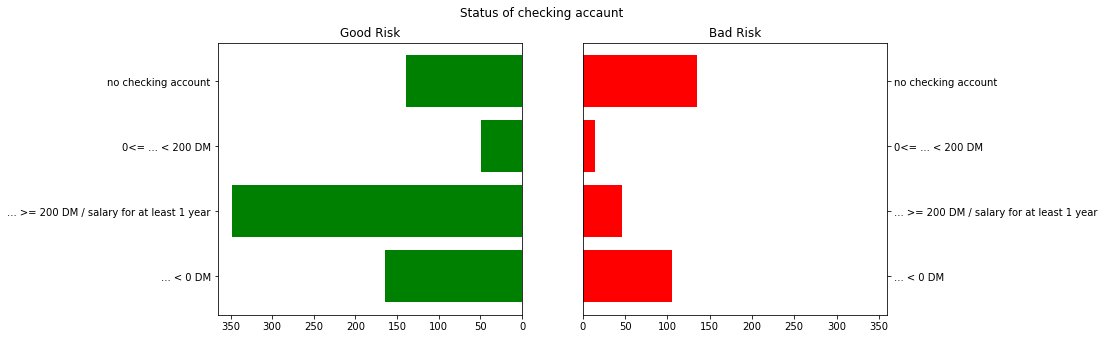

In [16]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Status of checking accaunt')
ax = fig.add_subplot(121)
plt.gca().invert_xaxis()
index = np.arange(4)
values1 = np.arange(4)
for i in range(4):
    values1[i] = len(good[good['status'] == statuses[i]])
plt.title('Good Risk')
plt.barh(index, values1, color='g')
plt.yticks(index, statuses)
ax = fig.add_subplot(122)
values2 = np.arange(4)
for i in range(4):
    values2[i] = len(bad[bad['status'] == statuses[i]])
plt.title('Bad Risk')
plt.barh(index, values2, color='r')
plt.yticks(index, statuses)
plt.gca().yaxis.tick_right()
plt.xlim([0, 360])
plt.show()


Вывод: в целом кредитный риск чаще хороший. Если нет расчетного счета, то хороший или плохой примерно равное число раз. Чем больше средств на счете, тем больше процент хороших.

### Задание 8  (0.5 балла)

In [17]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

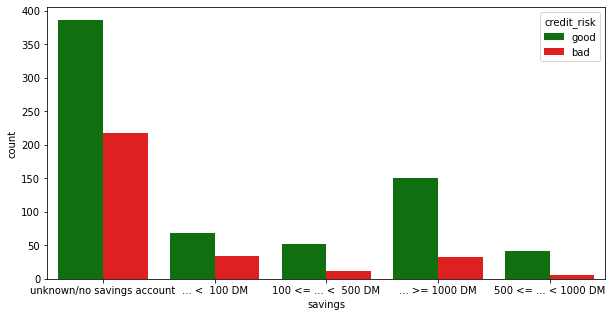

In [18]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(x = 'savings', hue = 'credit_risk', data = data, palette=['g', 'r'])
plt.show()

С точки зрения трудоёмкости написания кода этот процесс во много раз легче. И с точки зрения восприятия результата он также нравится больше, так как в таком виде проще визуально сравнивать высоту рядом стоящих колонок. А когда они зеркальны, то сложнее.

# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

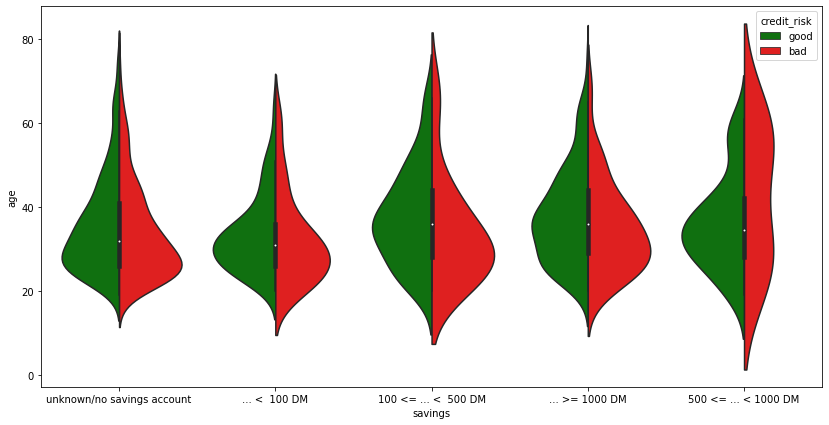

In [19]:
fig = plt.figure(figsize=(14, 7))
ax = sns.violinplot(x = 'savings', y='age', hue = 'credit_risk', data = data, palette=['g', 'r'], split=True)

При такой визуализации видно ещё больше тенденций. Ассимметрия наглядно показывает, в каких местах возниеают особенности. Например, на последней диаграмме видно, что для людей с очень маленьким возрастом или очень большим возрастом больше кредитный риск.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

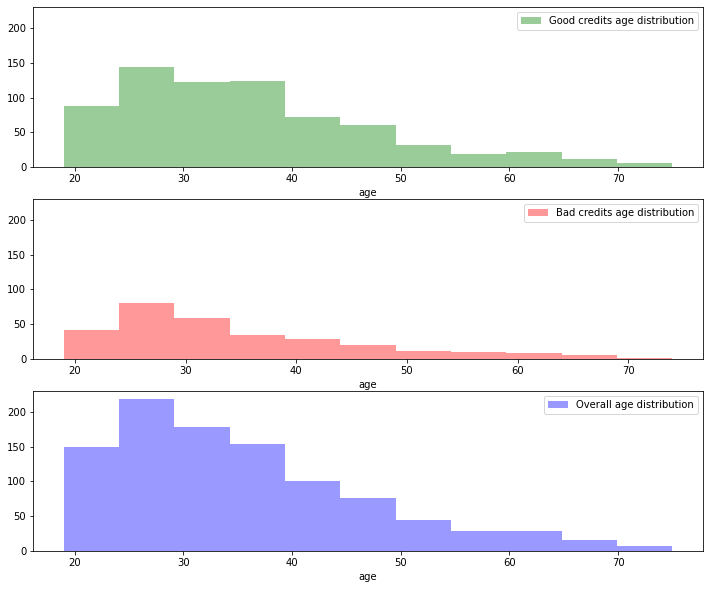

In [20]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
fig1 = sns.distplot(data[data['credit_risk'] == 'good']['age'], kde=False, bins=11, color='g')
plt.ylim([0, 230])
plt.legend(('Good credits age distribution', ''))
ax2 = fig.add_subplot(312)
fig2 = sns.distplot(data[data['credit_risk'] == 'bad']['age'], kde=False, bins=11, color='r')
plt.ylim([0, 230])
plt.legend(('Bad credits age distribution', ''))
ax3 = fig.add_subplot(313)
fig3 = sns.distplot(data['age'], kde=False, bins=11, color='b')
plt.legend(('Overall age distribution', ''))

Можно заметить, что формы всех гистограмм похожи, но "ступеньки" не всегда ведут себя одинаково. Например, четвертый столбец на второй и третьей гистогаммах ниже, чем третий. А первой гистограмме наоборот. В этом возрасте (примерно 33-39) меньше кредитный риск.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

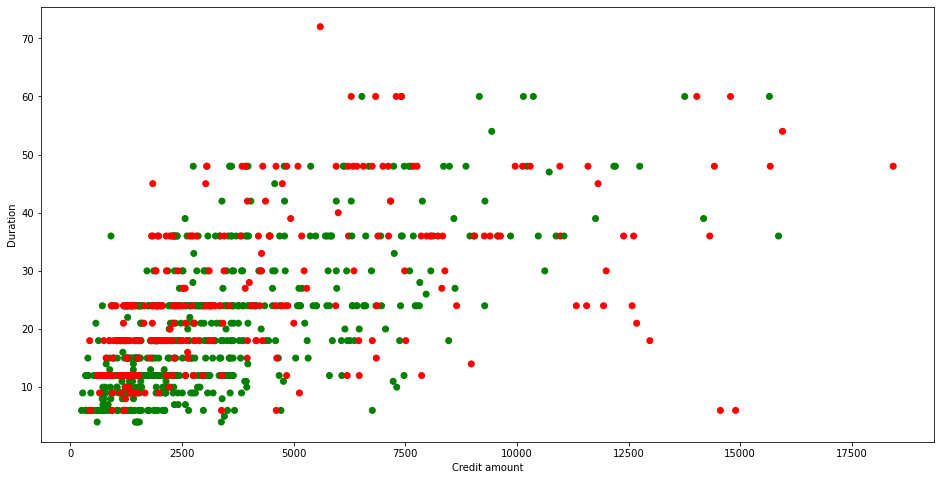

In [21]:
fig = plt.figure(figsize=(16, 8))
colors={'good':'g', 'bad':'r'}
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.scatter(data.iloc[:,4], data.iloc[:,1], c=[colors[data.iloc[i,-1]] for i in range(1000)])

Видно, что для кредитов с низкой продолжительностью и большой суммой -- плохой кредитный риск. Но вообще риск выше у кредитов с высокой продолжительностью.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

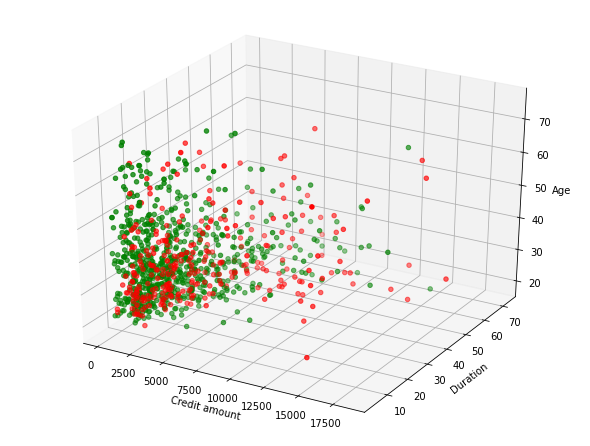

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
colors={'good':'g', 'bad':'r'}
ax = Axes3D(fig)
X = data.iloc[:,4]
Y = data.iloc[:,1]
Z = data.iloc[:,-9]
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.scatter(X, Y, Z, c=[colors[data.iloc[i,-1]] for i in range(1000)])

Мне довольно сложно воспринимать такую диаграмму в трехмерном пространстве, но по ней всё равно заметно, что в некоторых местах скопление зеленых точек, а в некоторых -- красных.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [23]:
bin_columns

['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [24]:
ord_columns

['status',
 'savings',
 'employment_duration',
 'installment_rate',
 'present_residence',
 'number_credits']

In [25]:
data['people_liable'] = data['people_liable'].replace(['0 to 2', '3 or more'], [0, 1])
data['telephone'] = data['telephone'].replace(['no', 'yes (under customer name)'], [0, 1])
data['foreign_worker'] = data['foreign_worker'].replace(['no', 'yes'], [0, 1])
data['credit_risk'] = data['credit_risk'].replace(['good', 'bad'], [0, 1])
data['status'] = data['status'].replace(['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'], [0, 1, 2, 3])
data['savings'] = data['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'], [0, 1, 2, 3, 4])
data['employment_duration'] = data['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3, 4])
data['installment_rate'] = data['installment_rate'].replace(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'], [0, 1, 2, 3])
data['present_residence'] = data['present_residence'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3])
data['number_credits'] = data['number_credits'].replace(['1', '3-Feb', '5-Apr', '>= 6'], [0, 1, 2, 3])

In [26]:
data = data.drop(columns=cat_columns)

In [27]:
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,0
1,0,9,2799,0,2,2,1,36,1,1,0,0,0
2,1,12,841,1,3,2,3,23,0,0,0,0,0
3,0,12,2122,0,2,1,1,39,1,1,0,1,0
4,0,12,2171,0,2,0,3,38,1,0,0,1,0


### Задание 14  (2 балла)

In [28]:
data[data['credit_risk']==1]

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
22,1,36,2384,0,1,0,0,33,0,0,0,0,1
45,0,18,1216,0,1,0,2,23,0,0,1,0,1
47,3,18,1864,1,2,0,1,30,1,0,0,0,1
97,1,36,4455,0,2,2,1,30,1,0,1,0,1
110,0,15,3959,0,2,1,1,29,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,0,0,1
996,0,24,2303,0,4,0,0,45,0,0,0,0,1
997,3,21,12680,4,4,0,3,30,0,0,1,0,1
998,1,12,6468,4,0,2,0,52,0,0,1,0,1


По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [29]:
#Если делать константное предсказание, то точность на тесте уже будет 0.66 из-за несбалансированности выборки.
#А на трейне точность вообще 0.71.
def predict(Xtest: np.array) -> np.array:
    return np.zeros(Xtest.shape[0])

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
print(accuracy_score(y_train, predict(X_train)))
# your code here
print(accuracy_score(y_test, predict(X_test)))

0.7133333333333334
0.66


Это всё прекрасно, но модель ничего не предсказывает. Попробую построить какую-нибудь линейную. Чем больше число, тем ближе к плохому кредитному риску, чем меньше -- тем ближе к хорошему. Из задания 7 ясно, что надо брать 'status' с отрицательным коэффциентом. Также ясно, что надо брать 'amount' c положительным (если сумма большая, то риск выше). Чтобы проще было с коэффициентами перенесем всё в один интервал для этих столбцов. (Все коэффициенты по-честному подбираю на трейне.)

In [30]:
data['status'] = (data['status'] - data['status'].min()) / (data['status'].max() - data['status'].min())
data['amount'] = (data['amount'] - data['amount'].min()) / (data['amount'].max() - data['amount'].min())
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [31]:
def predict1(x):
    if x >= 0.2:
        return 1
    else:
        return 0
def predict(Xtest: np.array) -> np.array:
    n = Xtest.shape[0]
    a = np.zeros(n)
    for i in range(n):
        #a[i] = 0
        a[i] = predict1(Xtest[i][0]*(-1) + Xtest[i][2]*1)
    return a
print(accuracy_score(y_train, predict(X_train)))
print(accuracy_score(y_test, predict(X_test)))

0.7426666666666667
0.692


Стало получше, ура! Это, конечно, очень примитивная модель, но немного лучше, чем константа :)